In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
from algorithm import SIFT_keypoint_detection, BRISK_keypoint_detection, ORB_keypoint_detection, BF_matcher, FLANN_matcher, RoMa_matcher, superglue_matcher, display_image

I used data from the Kaggle dataset (https://www.kaggle.com/datasets/isaienkov/deforestation-in-ukraine). I resized it beforehand for faster data processing. The code for resizing:


```
def load_and_preprocess_image(image_path, max_dimension=1024):

    img = cv2.imread(image_path, 0)
    height, width = img.shape
    scale = max_dimension / max(height, width)
    resized_img = cv2.resize(img, (int(width * scale), int(height * scale)))
    return resized_img
```



In [ ]:
img1_path = './data/T36UYA_20190825T083601_TCI.jpg'
img2_path = './data/T36UYA_20190706T083611_TCI.jpg'

In [ ]:
display_image(img1_path)

Here is an example of using the SIFT algorithm to find key points with descriptors for them.
You can also try `BRISK_keypoint_detection` and `ORB_keypoint_detection`

In [ ]:
SIFT_keypoints, SIFT_descriptors = SIFT_keypoint_detection(img1_path)


Let's try to match the images with BrutForce and FLINN algorithms, then with RoMa and superglue models using SIFT keypoints and descriptors

In [ ]:
SIFT_keypoints1, SIFT_descriptors1 = SIFT_keypoint_detection(img1_path, plot = False)
SIFT_keypoints2, SIFT_descriptors2 = SIFT_keypoint_detection(img2_path, plot = False)


Number of keypoints detected: 4362
Number of keypoints detected: 16223


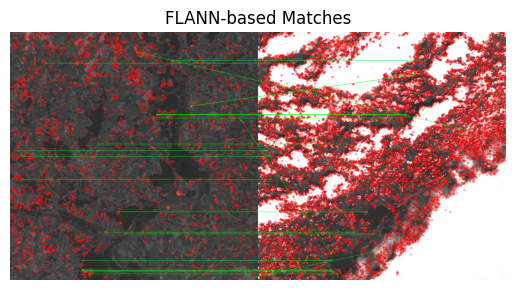

array([[[ 68,  68,  68],
        [ 67,  67,  67],
        [ 58,  58,  58],
        ...,
        [251, 251, 251],
        [255, 255, 255],
        [250, 250, 250]],

       [[ 75,  75,  75],
        [ 65,  65,  65],
        [ 71,  71,  71],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 66,  66,  66],
        [ 60,  60,  60],
        [ 67,  67,  67],
        ...,
        [248, 248, 248],
        [249, 249, 249],
        [250, 250, 250]],

       ...,

       [[ 70,  70,  70],
        [ 63,  63,  63],
        [ 63,  63,  63],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 67,  67,  67],
        [ 68,  68,  68],
        [ 74,  74,  74],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [255, 255, 255]],

       [[ 73,  73,  73],
        [ 67,  67,  67],
        [ 80,  80,  80],
        ...,
        [255, 255, 255],
        [251, 251, 251],
        [255, 255, 255]]

In [ ]:
BF_matcher(img1_path, img2_path, SIFT_keypoints1, SIFT_descriptors1, SIFT_keypoints2, SIFT_descriptors2)

In [ ]:
FLANN_matcher(img1_path, img2_path, SIFT_keypoints1, SIFT_descriptors1, SIFT_keypoints2, SIFT_descriptors2)

In the case of RoMa and Superglue models, we cannot use our keypoints and descriptors, as these models are imported and have implemented keypoints detection.

Matching results can be found in the matches folder under the names `matches_RoMa_result.png` and `matches_superglue_result.png`

In [ ]:
RoMa_matcher(img1_path, img2_path)

In [ ]:
superglue_matcher(img1_path, img2_path)